In [3]:
import pandas as pd
import numpy as np
import pickle
import time
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance
import xgboost as xgb
import matplotlib.pyplot as plt
import sys
import gc
import seaborn as sns

In [4]:
def save_pkl(file_dir, data):
    f = open(file_dir,"wb")
    pickle.dump(data, f, protocol=4)
    f.close()
    
def read_pkl(file_dir):
    f = open(file_dir,"rb")
    data = pickle.load(f)
    return data

def mape_error(y_true, y_pred):
    return -np.sqrt(np.sum((y_pred - y_true) * (y_pred - y_true)) * 1.0 / y_true.shape[0])

def scoring(reg, x, y):
    pred = reg.predict(x)
    return smape(pred, y)

def smape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred) * 2)

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

def model_performance_sc_plot(predictions, labels, title):
    # Get min and max values of the predictions and labels.
    min_val = max(max(predictions), max(labels))
    max_val = min(min(predictions), min(labels))
    # Create dataframe with predicitons and labels.
    performance_df = pd.DataFrame({"Label":labels})
    performance_df["Prediction"] = predictions
    # Plot data
    sns.jointplot(y="Label", x="Prediction", data=performance_df, kind="reg")
    plt.plot([min_val, max_val], [min_val, max_val],'m--')
    plt.title(title, fontsize=9)
    plt.show()

In [3]:
# load the whole size dataset
X = np.load("London/X_m.npy")
Y_NO2 = np.load("London/Y_NO2_m.npy")
Y_PM10 = np.load("London/Y_PM10_m.npy")
Y_PM25 = np.load("London/Y_PM25_m.npy")

# PM25

In [ ]:
# split the Y_PM25, X into training part and testing part
train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25 = train_test_split(X, Y_PM25, test_size=0.2, random_state=11)
print(train_X_PM25.shape, test_X_PM25.shape, train_Y_PM25.shape, test_Y_PM25.shape)

In [ ]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    gamma=0.8,
    min_child_weight=2,
    reg_alpha=0.001,
    max_delta_step=0,
    colsample_bylevel=0.9,
    colsample_bytree=0.8, 
    subsample=0.8,
    base_score=10,
    eta=0.3,    
    seed=1)

model.fit(
    train_X_PM25, 
    train_Y_PM25, 
    eval_metric="rmse", 
    eval_set=[(train_X_PM25, train_Y_PM25), (test_X_PM25, test_Y_PM25)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_PM25)
print (smape(pred, test_Y_PM25))
time.time() - ts

In [ ]:
save_pkl("London/xgboost_PM25.model", model)

In [ ]:
test_X = np.load("London/X_test.npy")
test_Y = np.load("London/Y_PM25_test.npy")
pred = model.predict(test_X)
print (smape(pred, test_Y))

In [ ]:
plot_features(model, (20,30))

# NO2

In [ ]:
# split the Y_NO2, X into training part and testing part
train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2 = train_test_split(X, Y_NO2, test_size=0.2, random_state=11)
print(train_X_NO2.shape, test_X_NO2.shape, train_Y_NO2.shape, test_Y_NO2.shape)

In [ ]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    learning_rate=0.001,
    n_estimators=1000,
    gamma=0.8,
    min_child_weight=2,
    reg_alpha=0.001,
    max_delta_step=0,
    colsample_bylevel=0.9,
    colsample_bytree=0.8, 
    subsample=0.8,
    base_score=10,
    eta=0.3,    
    seed=1,
    nthread=30)

model.fit(
    train_X_NO2, 
    train_Y_NO2, 
    eval_metric="rmse", 
    eval_set=[(train_X_NO2, train_Y_NO2), (test_X_NO2, test_Y_NO2)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_NO2)
print (smape(pred, test_Y_NO2))
time.time() - ts

In [ ]:
save_pkl("London/xgboost_NO2.model", model)

In [ ]:
test_X = np.load("London/X_test.npy")
test_Y = np.load("London/Y_No2_test.npy")
pred = model.predict(test_X)
print (smape(pred, test_Y))

In [ ]:
plot_features(model, (20,20))

# PM10

In [4]:
# split the Y_PM10, X into training part and testing part
train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10 = train_test_split(X, Y_PM10, test_size=0.2, random_state=11)
print(train_X_PM10.shape, test_X_PM10.shape, train_Y_PM10.shape, test_Y_PM10.shape)

(730828, 198) (182708, 198) (730828,) (182708,)


In [5]:
#XGBoost
def smape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred) * 2)

ts = time.time()

model = XGBRegressor(
    max_depth=10,
    learning_rate=0.001,
    n_estimators=1000,
    gamma=0.8,
    min_child_weight=2,
    reg_alpha=0.001,
    max_delta_step=0,
    colsample_bylevel=0.9,
    colsample_bytree=0.8, 
    subsample=0.8,
    base_score=10,
    eta=0.3,    
    seed=1,
    nthread=30)

model.fit(
    train_X_PM10, 
    train_Y_PM10, 
    #eval_metric="smape", 
    eval_set=[(train_X_PM10, train_Y_PM10), (test_X_PM10, test_Y_PM10)], 
    verbose=True, 
    early_stopping_rounds = 10)

pred = model.predict(test_X_PM10)
print (smape(pred, test_Y_PM10))
time.time() - ts

[0]	validation_0-rmse:27.9231	validation_1-rmse:27.9141
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:27.8976	validation_1-rmse:27.8872
[2]	validation_0-rmse:27.8704	validation_1-rmse:27.8611
[3]	validation_0-rmse:27.8448	validation_1-rmse:27.8347
[4]	validation_0-rmse:27.8184	validation_1-rmse:27.8081
[5]	validation_0-rmse:27.7917	validation_1-rmse:27.7818
[6]	validation_0-rmse:27.7651	validation_1-rmse:27.7553
[7]	validation_0-rmse:27.7383	validation_1-rmse:27.7289
[8]	validation_0-rmse:27.7121	validation_1-rmse:27.7023
[9]	validation_0-rmse:27.686	validation_1-rmse:27.6763
[10]	validation_0-rmse:27.6593	validation_1-rmse:27.65
[11]	validation_0-rmse:27.6326	validation_1-rmse:27.6235
[12]	validation_0-rmse:27.6066	validation_1-rmse:27.5971
[13]	validation_0-rmse:27.5806	validation_1-rmse:27.5708
[14]	validation_0-rmse:27.5549	validation_1-rmse:27.5448

[141]	validation_0-rmse:24.4254	validation_1-rmse:24.4194
[142]	validation_0-rmse:24.4024	validation_1-rmse:24.3964
[143]	validation_0-rmse:24.379	validation_1-rmse:24.3733
[144]	validation_0-rmse:24.3558	validation_1-rmse:24.3502
[145]	validation_0-rmse:24.3327	validation_1-rmse:24.3272
[146]	validation_0-rmse:24.3098	validation_1-rmse:24.3042
[147]	validation_0-rmse:24.2866	validation_1-rmse:24.2813
[148]	validation_0-rmse:24.2639	validation_1-rmse:24.2587
[149]	validation_0-rmse:24.241	validation_1-rmse:24.2358
[150]	validation_0-rmse:24.2181	validation_1-rmse:24.2128
[151]	validation_0-rmse:24.1952	validation_1-rmse:24.19
[152]	validation_0-rmse:24.1725	validation_1-rmse:24.1671
[153]	validation_0-rmse:24.1495	validation_1-rmse:24.1443
[154]	validation_0-rmse:24.1265	validation_1-rmse:24.1215
[155]	validation_0-rmse:24.104	validation_1-rmse:24.0987
[156]	validation_0-rmse:24.0812	validation_1-rmse:24.0762
[157]	validation_0-rmse:24.0587	validation_1-rmse:24.0537
[158]	validation_0-

[283]	validation_0-rmse:21.3757	validation_1-rmse:21.3748
[284]	validation_0-rmse:21.3557	validation_1-rmse:21.3548
[285]	validation_0-rmse:21.3357	validation_1-rmse:21.335
[286]	validation_0-rmse:21.3159	validation_1-rmse:21.3152
[287]	validation_0-rmse:21.2959	validation_1-rmse:21.2953
[288]	validation_0-rmse:21.2766	validation_1-rmse:21.2759
[289]	validation_0-rmse:21.2568	validation_1-rmse:21.2561
[290]	validation_0-rmse:21.2372	validation_1-rmse:21.2364
[291]	validation_0-rmse:21.2174	validation_1-rmse:21.2167
[292]	validation_0-rmse:21.1975	validation_1-rmse:21.1968
[293]	validation_0-rmse:21.1781	validation_1-rmse:21.1773
[294]	validation_0-rmse:21.1584	validation_1-rmse:21.1577
[295]	validation_0-rmse:21.1386	validation_1-rmse:21.1381
[296]	validation_0-rmse:21.1189	validation_1-rmse:21.1182
[297]	validation_0-rmse:21.0992	validation_1-rmse:21.0986
[298]	validation_0-rmse:21.0796	validation_1-rmse:21.079
[299]	validation_0-rmse:21.0598	validation_1-rmse:21.0592
[300]	validation

[425]	validation_0-rmse:18.7447	validation_1-rmse:18.7474
[426]	validation_0-rmse:18.7274	validation_1-rmse:18.7302
[427]	validation_0-rmse:18.7102	validation_1-rmse:18.713
[428]	validation_0-rmse:18.6929	validation_1-rmse:18.6958
[429]	validation_0-rmse:18.6757	validation_1-rmse:18.6786
[430]	validation_0-rmse:18.6586	validation_1-rmse:18.6615
[431]	validation_0-rmse:18.6414	validation_1-rmse:18.6444
[432]	validation_0-rmse:18.6244	validation_1-rmse:18.6274
[433]	validation_0-rmse:18.6073	validation_1-rmse:18.6104
[434]	validation_0-rmse:18.5902	validation_1-rmse:18.5934
[435]	validation_0-rmse:18.5732	validation_1-rmse:18.5765
[436]	validation_0-rmse:18.5563	validation_1-rmse:18.5594
[437]	validation_0-rmse:18.5394	validation_1-rmse:18.5425
[438]	validation_0-rmse:18.5225	validation_1-rmse:18.5255
[439]	validation_0-rmse:18.5055	validation_1-rmse:18.5086
[440]	validation_0-rmse:18.4886	validation_1-rmse:18.4917
[441]	validation_0-rmse:18.4716	validation_1-rmse:18.4748
[442]	validatio

[567]	validation_0-rmse:16.4718	validation_1-rmse:16.4801
[568]	validation_0-rmse:16.457	validation_1-rmse:16.4654
[569]	validation_0-rmse:16.4421	validation_1-rmse:16.4505
[570]	validation_0-rmse:16.4272	validation_1-rmse:16.4358
[571]	validation_0-rmse:16.4125	validation_1-rmse:16.4211
[572]	validation_0-rmse:16.3977	validation_1-rmse:16.4063
[573]	validation_0-rmse:16.383	validation_1-rmse:16.3916
[574]	validation_0-rmse:16.3683	validation_1-rmse:16.3769
[575]	validation_0-rmse:16.3535	validation_1-rmse:16.3622
[576]	validation_0-rmse:16.3388	validation_1-rmse:16.3474
[577]	validation_0-rmse:16.324	validation_1-rmse:16.3328
[578]	validation_0-rmse:16.3093	validation_1-rmse:16.3181
[579]	validation_0-rmse:16.2949	validation_1-rmse:16.3037
[580]	validation_0-rmse:16.2802	validation_1-rmse:16.2892
[581]	validation_0-rmse:16.2656	validation_1-rmse:16.2746
[582]	validation_0-rmse:16.2511	validation_1-rmse:16.2601
[583]	validation_0-rmse:16.2363	validation_1-rmse:16.2454
[584]	validation_

[709]	validation_0-rmse:14.5139	validation_1-rmse:14.5271
[710]	validation_0-rmse:14.5011	validation_1-rmse:14.5143
[711]	validation_0-rmse:14.4884	validation_1-rmse:14.5015
[712]	validation_0-rmse:14.4755	validation_1-rmse:14.4888
[713]	validation_0-rmse:14.4628	validation_1-rmse:14.476
[714]	validation_0-rmse:14.4501	validation_1-rmse:14.4634
[715]	validation_0-rmse:14.4376	validation_1-rmse:14.4509
[716]	validation_0-rmse:14.4248	validation_1-rmse:14.4382
[717]	validation_0-rmse:14.4121	validation_1-rmse:14.4255
[718]	validation_0-rmse:14.3994	validation_1-rmse:14.4129
[719]	validation_0-rmse:14.3867	validation_1-rmse:14.4002
[720]	validation_0-rmse:14.3741	validation_1-rmse:14.3876
[721]	validation_0-rmse:14.3613	validation_1-rmse:14.3749
[722]	validation_0-rmse:14.3487	validation_1-rmse:14.3624
[723]	validation_0-rmse:14.3361	validation_1-rmse:14.3498
[724]	validation_0-rmse:14.3234	validation_1-rmse:14.3372
[725]	validation_0-rmse:14.3109	validation_1-rmse:14.3248
[726]	validatio

[851]	validation_0-rmse:12.8292	validation_1-rmse:12.8478
[852]	validation_0-rmse:12.8182	validation_1-rmse:12.8368
[853]	validation_0-rmse:12.8073	validation_1-rmse:12.8258
[854]	validation_0-rmse:12.7963	validation_1-rmse:12.8149
[855]	validation_0-rmse:12.7853	validation_1-rmse:12.804
[856]	validation_0-rmse:12.7743	validation_1-rmse:12.7931
[857]	validation_0-rmse:12.7635	validation_1-rmse:12.7822
[858]	validation_0-rmse:12.7526	validation_1-rmse:12.7713
[859]	validation_0-rmse:12.7416	validation_1-rmse:12.7603
[860]	validation_0-rmse:12.7307	validation_1-rmse:12.7495
[861]	validation_0-rmse:12.7197	validation_1-rmse:12.7386
[862]	validation_0-rmse:12.7088	validation_1-rmse:12.7278
[863]	validation_0-rmse:12.6979	validation_1-rmse:12.717
[864]	validation_0-rmse:12.687	validation_1-rmse:12.7061
[865]	validation_0-rmse:12.6762	validation_1-rmse:12.6953
[866]	validation_0-rmse:12.6653	validation_1-rmse:12.6846
[867]	validation_0-rmse:12.6545	validation_1-rmse:12.6737
[868]	validation_

[993]	validation_0-rmse:11.3819	validation_1-rmse:11.4067
[994]	validation_0-rmse:11.3725	validation_1-rmse:11.3973
[995]	validation_0-rmse:11.3631	validation_1-rmse:11.388
[996]	validation_0-rmse:11.3537	validation_1-rmse:11.3786
[997]	validation_0-rmse:11.3443	validation_1-rmse:11.3692
[998]	validation_0-rmse:11.3349	validation_1-rmse:11.3599
[999]	validation_0-rmse:11.3256	validation_1-rmse:11.3506
0.2752286264341644


27304.685900211334

In [6]:
save_pkl("London/xgboost_PM10.model", model)

In [7]:
test_X = np.load("London/X_test.npy")
test_Y = np.load("London/Y_No2_test.npy")
pred = model.predict(test_X)
print (smape(pred, test_Y))

0.7192290740305299


In [ ]:
pred = model.predict(test_X_PM10)
model_performance_sc_plot(pred, test_Y_PM10, 'test')

In [ ]:
test_Y_PM10

In [ ]:
plot_features(model, (20,20))

# grid search for pm25

In [ ]:
#grid search 
params = {
    # 'objective': reg:linear,
    'max_depth': 5,
    # 'learning_rate':0.001,
    'learning_rate': 0.001,
    'n_estimators': 2000,
    'gamma': 0.0,
    'min_child_weight': 2,
    'max_delta_step': 0,
    'subsample': 0.9,
    'colsample_bytree': 0.6,
    'colsample_bylevel': 0.9,
    'base_score': 10,
    'seed': 1
}

'''
'max_depth': 10,
'learning_rate': 0.001,
# 'learning_rate': 0.02,
'n_estimators': 3000,
'gamma': 0.8,
'min_child_weight': 2,
'reg_alpha': 0.001,
'max_delta_step': 0,
'subsample': 0.8,
'colsample_bytree': 0.8,
'colsample_bylevel': 0.9,
'base_score': 10,
'seed': 1,
'nthread': 10
'''

param_test1 = {
    'max_depth': range(7, 12, 2),
    'min_child_weight': [2],
    'gamma': [i / 10.0 for i in range(8, 9)],
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)],
    'reg_alpha': [0, 0.001, 0.001],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [1000, 2000, 3000]
}

param_test3 = {
    'gamma': [i / 10.0 for i in range(0, 10)]
}

param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
}

param_test6 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

param_test7 = {
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
}

param_test8 = {
    'learning_rate': [0.001, 0.002, 0.005, 0.01, 0.1],
    'n_estimators': [2000, 3000, 4000],
}

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=2)
estimator=xgb.XGBRegressor(
    learning_rate=0.001,
    n_estimators=3000,
    max_depth=10,
    min_child_weight=2,
    reg_alpha=0.001,
    gamma=0.6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    seed=27)
gsearch1 = GridSearchCV(estimator, param_grid=param_test8, scoring=scoring, n_jobs=-1, cv=cv, verbose=6)
print (1)



In [ ]:
gsearch1.fit(train_X_PM25, train_Y_PM25)
print (gsearch1.grid_scores_, gsearch1.best_score_)
print (gsearch1.best_params_)

In [ ]:
    '''   
    best_params1 = {
            'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 3000,
            'gamma': 0.8,
            'min_child_weight': 2,
            'reg_alpha': 0.001,
            'max_delta_step': 0,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'colsample_bylevel': 0.9,
            'base_score': 10,
            'seed': 1,
            'nthread': 30
        }
    '''

In [5]:
xgb_PM25 = read_pkl("London/xgboost_PM25.model")
xgb_PM10 = read_pkl("London/xgboost_PM10.model")
xgb_No2 = read_pkl("London/xgboost_No2.model")

In [6]:
from xgboost import plot_importance
from matplotlib import pyplot

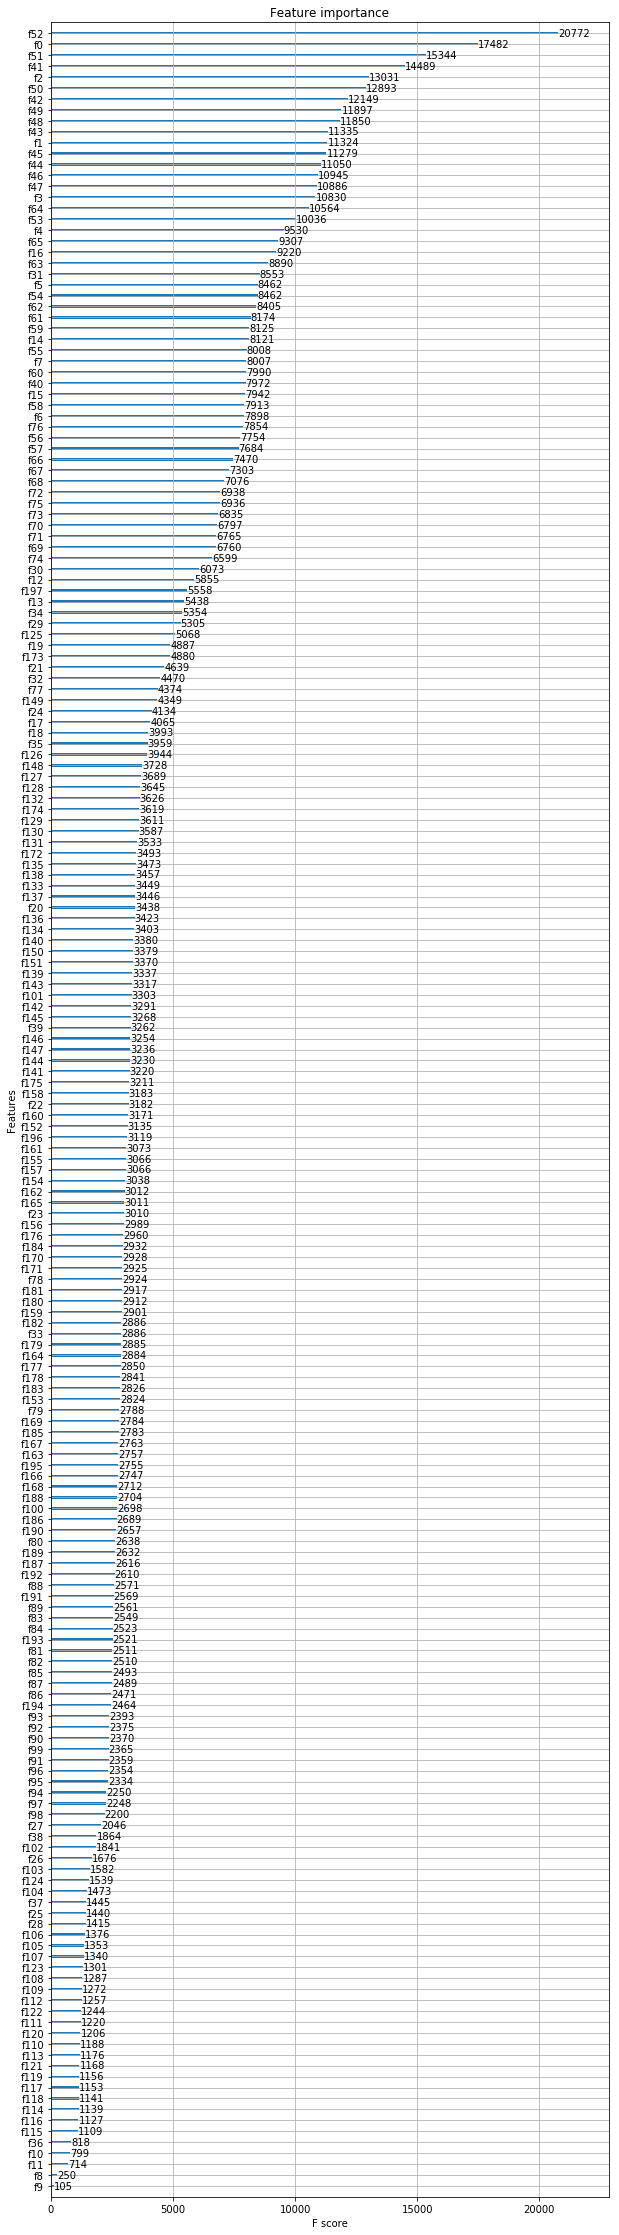

In [11]:
plot_features(xgb_PM25, (10,40))

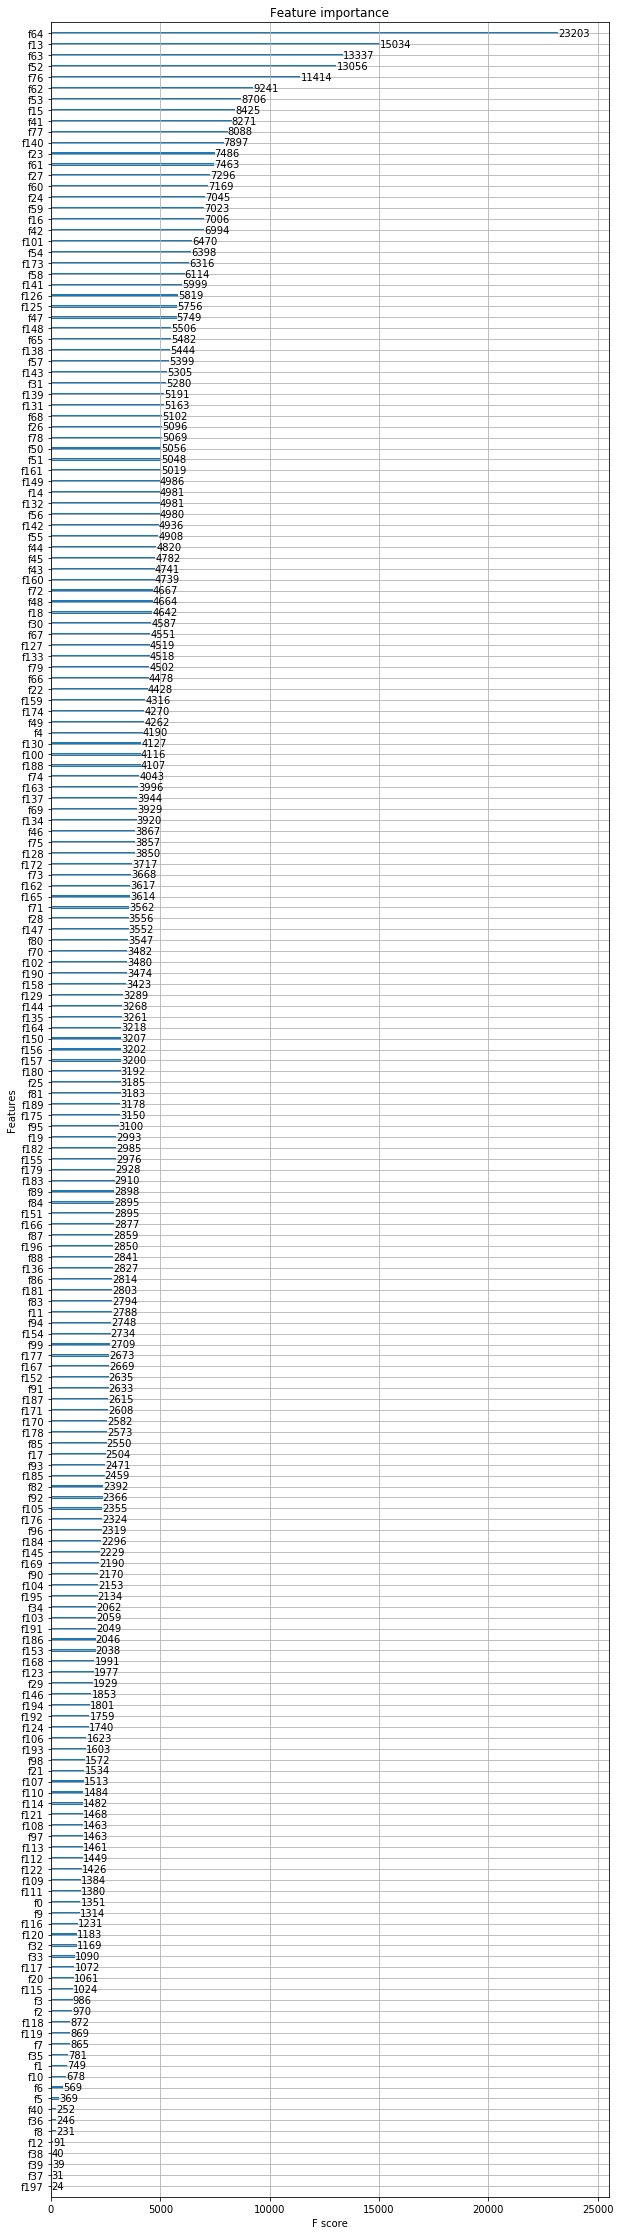

In [12]:
plot_features(xgb_PM10, (10,40))

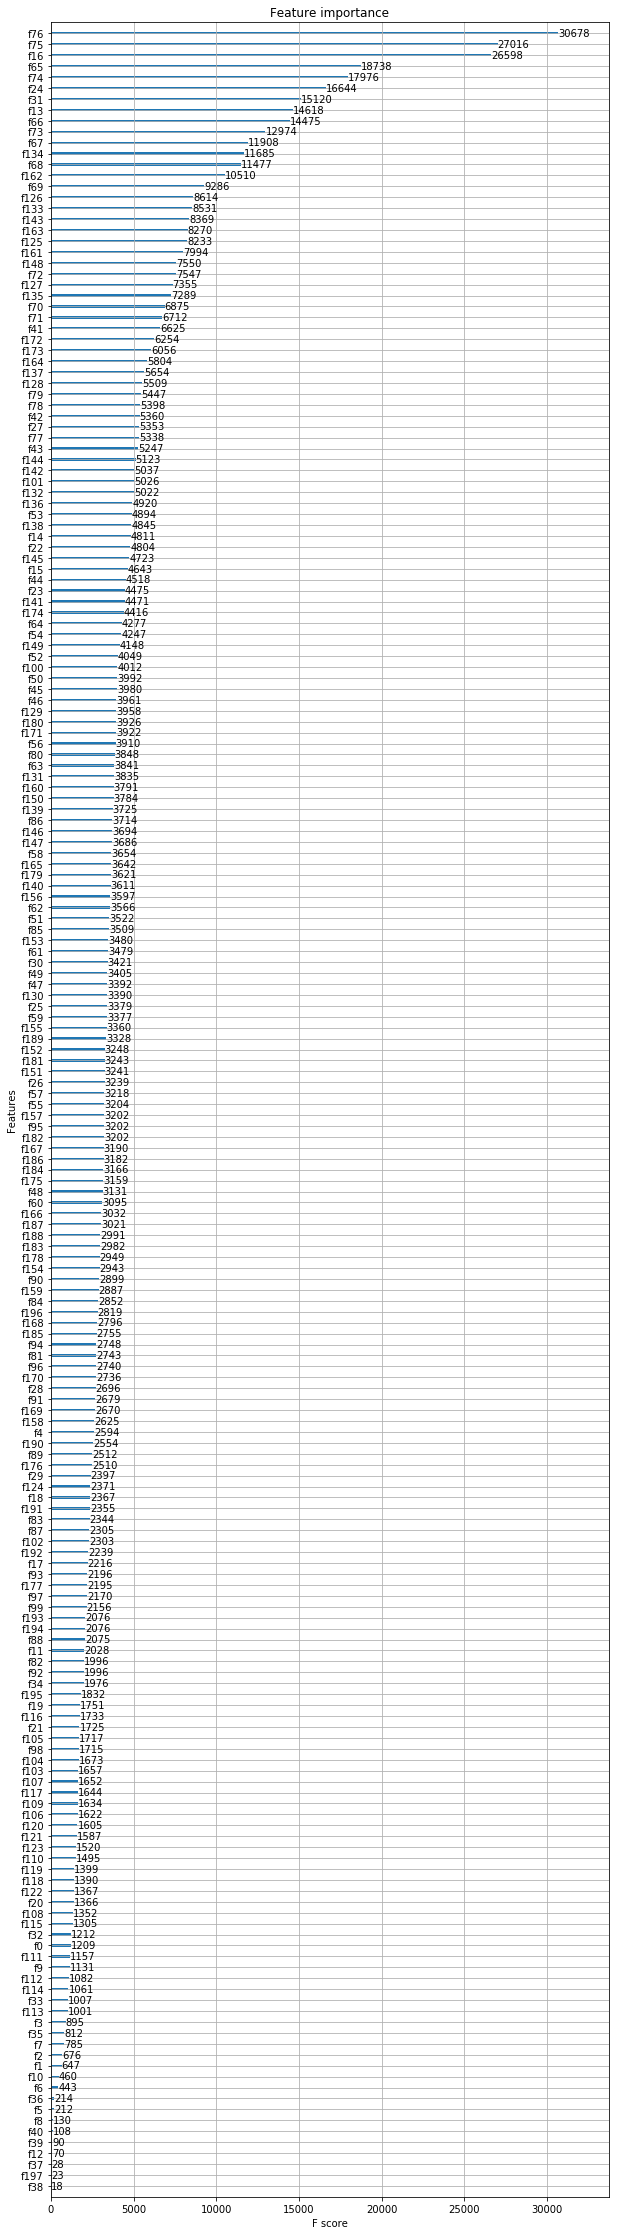

In [13]:
plot_features(xgb_No2, (10,40))